## Importamos la librería necesaria

In [3]:
import numpy as np
import pandas as pd 

# importar archivos
import os
import glob


from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.python.keras import regularizers

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from IPython.display import Image

## Cargamos los datos


In [4]:
#import zipfile
#zip_ref = zipfile.ZipFile('C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/dataset imágenes/cifake.zip', 'r')
#zip_ref.extractall('C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/dataset imágenes/dataset')
#zip_ref.close()

In [5]:

train_dir = 'C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/dataset imágenes/dataset/train/'
test_dir = 'C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/dataset imágenes/dataset/test/'

## Preprocesado


In [6]:
from PIL import Image
import numpy as np
import glob
X = []
y = []
image_size = (32, 32)  # Tamaño común para las imágenes

for filename in glob.glob(train_dir + "***/*.*"):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            
            with Image.open(filename) as img:
                img = img.convert('RGB')  # Convertir todas las imágenes a RGB
                img_resized = img.resize(image_size)
                img_array = np.array(img_resized)
                X.append(img_array)
                
                if "FAKE" in filename:
                    y.append(0)
                else:
                    y.append(1)



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 32, 32, 3), (80000,), (20000, 32, 32, 3), (20000,))

In [9]:

X_train[0], y_train[0]

(array([[[199, 255, 255],
         [190, 248, 250],
         [209, 255, 255],
         ...,
         [243, 255, 255],
         [242, 255, 255],
         [237, 250, 255]],
 
        [[184, 239, 246],
         [186, 239, 247],
         [206, 255, 255],
         ...,
         [232, 250, 254],
         [230, 247, 254],
         [225, 242, 249]],
 
        [[130, 176, 191],
         [123, 166, 182],
         [152, 194, 206],
         ...,
         [222, 246, 250],
         [219, 244, 248],
         [215, 240, 244]],
 
        ...,
 
        [[ 67,  68,  73],
         [ 75,  76,  80],
         [ 88,  89,  91],
         ...,
         [ 28,  33,  26],
         [ 40,  40,  32],
         [ 55,  52,  43]],
 
        [[151, 152, 156],
         [150, 151, 155],
         [148, 149, 151],
         ...,
         [ 39,  41,  30],
         [ 62,  58,  46],
         [ 86,  80,  68]],
 
        [[151, 152, 156],
         [143, 144, 148],
         [133, 135, 134],
         ...,
         [ 78,  79,  65],
  

In [10]:
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1.0/255.0)
train_it = datagen.flow(X_train, y_train, batch_size=64)
test_it = datagen.flow(X_test, y_test, batch_size=64)

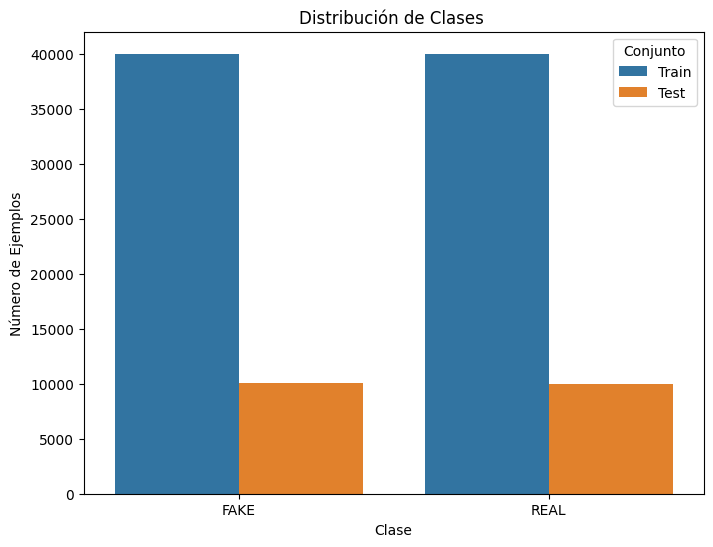

In [11]:

train_counts = Counter(y_train)
test_counts = Counter(y_test)
categories = ['FAKE', 'REAL']

# Crear listas para las etiquetas de las clases y sus respectivos conteos
classes = categories  # Suponiendo que categories = ['REAL', 'FAKE']
train_values = [train_counts[i] for i in range(len(classes))]
test_values = [test_counts[i] for i in range(len(classes))]

# Crear un DataFrame para facilitar la visualización con seaborn
import pandas as pd

df = pd.DataFrame({
    'Clase': classes * 2,
    'Número de ejemplos': train_values + test_values,
    'Conjunto': ['Train'] * len(classes) + ['Test'] * len(classes)
})

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Clase', y='Número de ejemplos', hue='Conjunto', data=df)
plt.title('Distribución de Clases ')
plt.xlabel('Clase')
plt.ylabel('Número de Ejemplos')
plt.show()

# Construcción del modelo 

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

c:\Users\naira\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,833 (878.25 KB)

 Trainable params: 224,833 (878.25 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(train_it, validation_data=test_it, epochs=50)

Epoch 1/50


c:\Users\naira\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - accuracy: 0.7683 - loss: 0.8094 - val_accuracy: 0.8735 - val_loss: 0.3143
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.8787 - loss: 0.3045 - val_accuracy: 0.8724 - val_loss: 0.3291
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.8956 - loss: 0.2688 - val_accuracy: 0.9139 - val_loss: 0.2316
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.9067 - loss: 0.2418 - val_accuracy: 0.9168 - val_loss: 0.2241
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.9155 - loss: 0.2257 - val_accuracy: 0.9084 - val_loss: 0.2526
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.9230 - loss: 0.2081 - val_accuracy: 0.9161 - val_loss: 0.2247
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9286 - loss: 0.1977 - val_accuracy: 0.9311 - val_loss: 0.1884
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.9344 - loss: 0.18

In [16]:
results = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7230 - loss: 234.7589
Test Loss: 232.36727905273438
Test Accuracy: 0.7245500087738037


In [17]:
def show_loss_accuracy_evolution(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Sparse Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

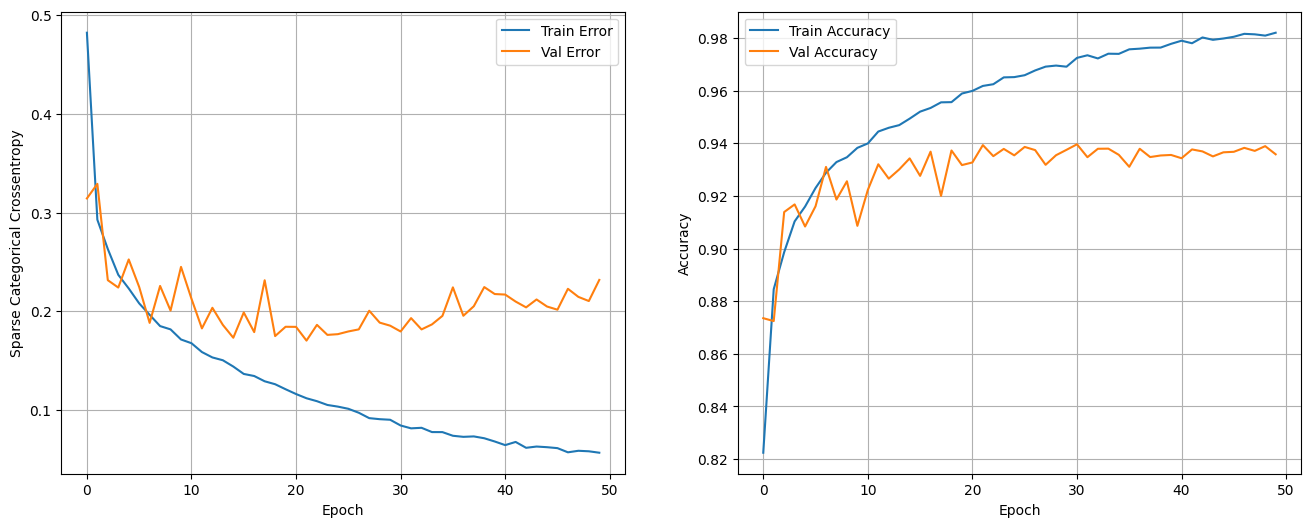

In [18]:
show_loss_accuracy_evolution(history)

# Evaluar el modelo

In [19]:
X = []
y = []
image_size = (32, 32)  # Tamaño común para las imágenes

for filename in glob.glob(test_dir + "***/*.*"):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            
            with Image.open(filename) as img:
                img = img.convert('RGB')  # Convertir todas las imágenes a RGB
                img_resized = img.resize(image_size)
                img_array = np.array(img_resized)
                X.append(img_array)
                
                if "FAKE" in filename:
                    y.append(0)
                else:
                    y.append(1)

In [20]:
X_val = np.array(X)
y_val = np.array(y)

In [21]:

X_val.shape, y_val.shape

((20000, 32, 32, 3), (20000,))

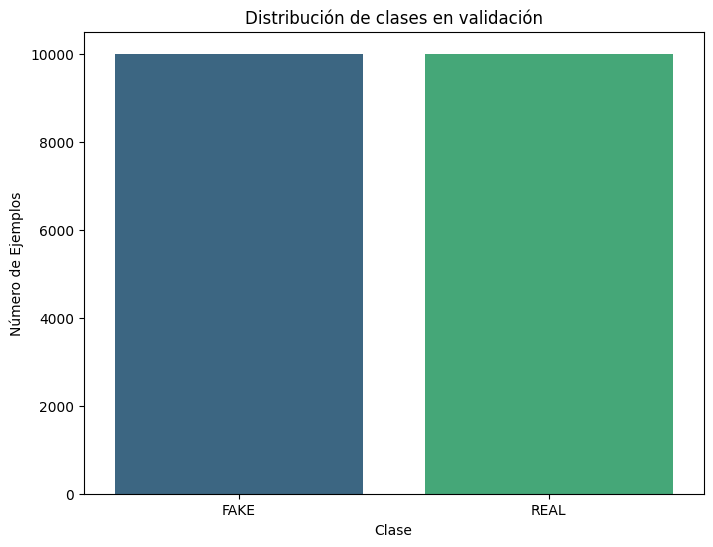

In [22]:
unique, counts = np.unique(y_val, return_counts=True)
class_counts = dict(zip(unique, counts))

# Crear listas para las etiquetas de las clases y sus respectivos conteos
labels = ['FAKE', 'REAL']  # Etiquetas de las clases
val_counts = [class_counts.get(i, 0) for i in range(len(labels))]
df = pd.DataFrame({
    'Clase': labels,
    'Número de Ejemplos': val_counts
})

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Clase', y='Número de Ejemplos', data=df, palette='viridis')
plt.title('Distribución de clases en validación')
plt.xlabel('Clase')
plt.ylabel('Número de Ejemplos')
plt.show()


In [25]:
val_it = datagen.flow(X_val, y_val, batch_size=64)

Curva Roc

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


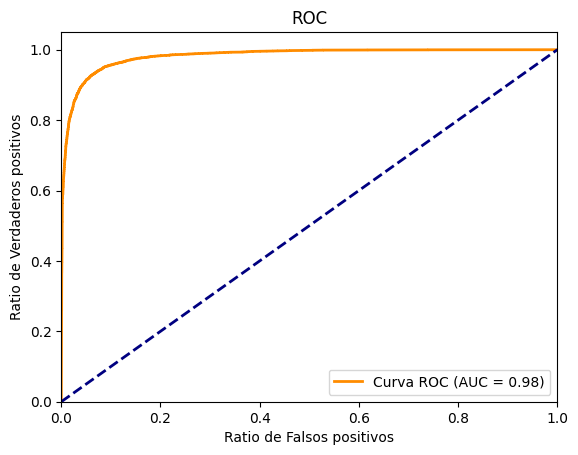

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

X_val_escalado = X_val*(1/255)
y_pred_prob = model.predict(X_val_escalado)  

fpr, tpr, _ = roc_curve(y_val, y_pred_prob)  


roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de Falsos positivos')
plt.ylabel('Ratio de Verdaderos positivos')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Evaluamos el modelo

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model, x_test, y_test):
    # Realizar predicciones
    X_test_escalado = x_test*(1/255)
    y_pred = model.predict(X_test_escalado)
    y_pred_classes = (y_pred > 0.5).astype(int) 
    
    # Calcular métricas
    cm = confusion_matrix(y_test, y_pred_classes)
    report = classification_report(y_test, y_pred_classes, target_names=['IA', 'REAL'])
    
    print("Reporte de Clasificación:\n", report)
    
    # Mostrar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['IA', 'REAL'], yticklabels=['IA', 'REAL'])
    plt.xlabel('Predicciones')
    plt.ylabel('Verdaderas')
    plt.title('Matriz de Confusión')
    plt.show()

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Reporte de Clasificación:
               precision    recall  f1-score   support

          IA       0.94      0.93      0.93     10000
        REAL       0.93      0.94      0.93     10000

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000



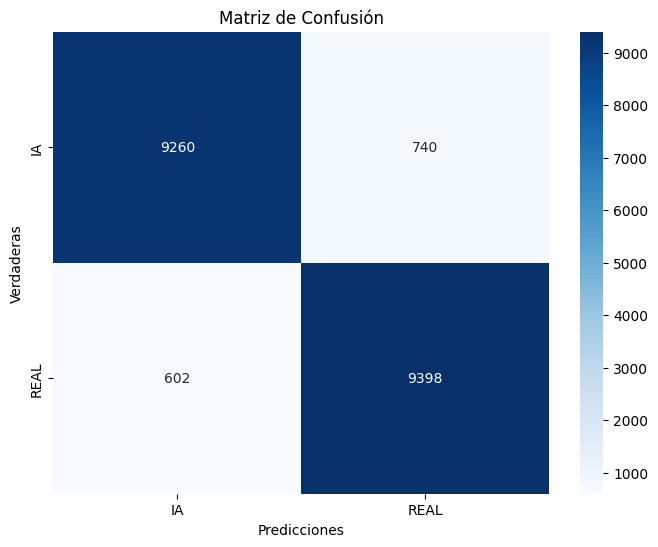

In [49]:
evaluate_model(model,X_val, y_val)

In [50]:
_, acc = model.evaluate(val_it)
print('> %.3f' % (acc * 100.0))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9338 - loss: 0.2478
> 93.290


# Guardar y Predecir el modelo 

In [ ]:
model.save('C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/modelo/model93.h5')

In [51]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

def predict(img_path,model):

    # Cargar la imagen y redimensionar a 32x32
    image1 = Image.open(img_path)
    image1 = image1.resize((32, 32))  # Redimensionar la imagen a 32x32 píxeles
    img_ar = np.asarray(image1)
    img_ar_rs = img_ar / 255.0  # Normalizar la imagen
    img_ar_rs1 = img_ar_rs.reshape(-1, 32, 32, 3)  # Redimensionar la imagen al tamaño esperado por el modelo

    # Realizar la predicción
    pred = model.predict(img_ar_rs1)

    # Interpretar la predicción
    if pred > 0.5:
        print("La imagen es Real.")
    else:
        print("La imagen está generada por IA.")

In [53]:
predict("C:/Users/naira/OneDrive/Documentos/Máster Data Science/TFM/dataset imágenes/cifake/train/REAL/0000 (3).jpg",model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
La imagen es Real.


# Modelo  con Early stopping 

In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras import regularizers

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))



c:\Users\naira\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,833 (878.25 KB)

 Trainable params: 224,833 (878.25 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=5,
    verbose = 1)

history =model1.fit(
    train_it,
    epochs=20, 
    validation_data=(test_it),
    callbacks=[early_stopping] )

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.7685 - loss: 0.8342 - val_accuracy: 0.8522 - val_loss: 0.3492
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8775 - loss: 0.3110 - val_accuracy: 0.8909 - val_loss: 0.2828
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.8976 - loss: 0.2657 - val_accuracy: 0.9129 - val_loss: 0.2317
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9098 - loss: 0.2411 - val_accuracy: 0.9112 - val_loss: 0.2305
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9159 - loss: 0.2270 - val_accuracy: 0.9201 - val_loss: 0.2165
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9232 - loss: 0.2084 - val_accuracy: 0.9231 - val_loss: 0.2082
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9272 - loss: 0.2000 - val_accuracy: 0.9208 - val_loss: 0.2063
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9288 -

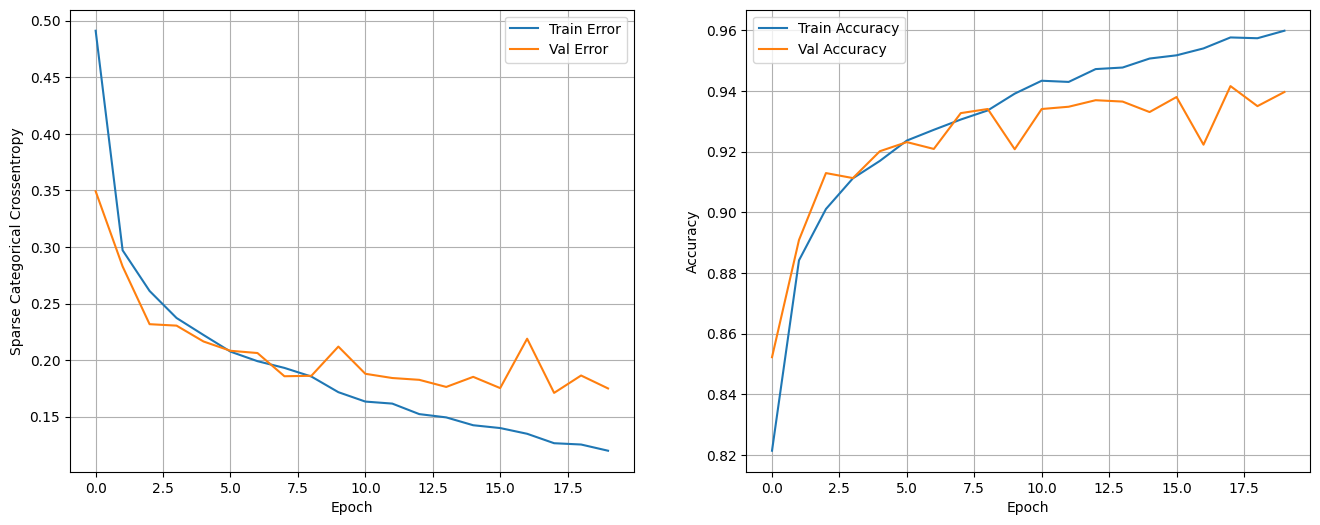

In [64]:
show_loss_accuracy_evolution(history)

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Reporte de Clasificación:
               precision    recall  f1-score   support

          IA       0.96      0.92      0.94     10000
        REAL       0.92      0.96      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



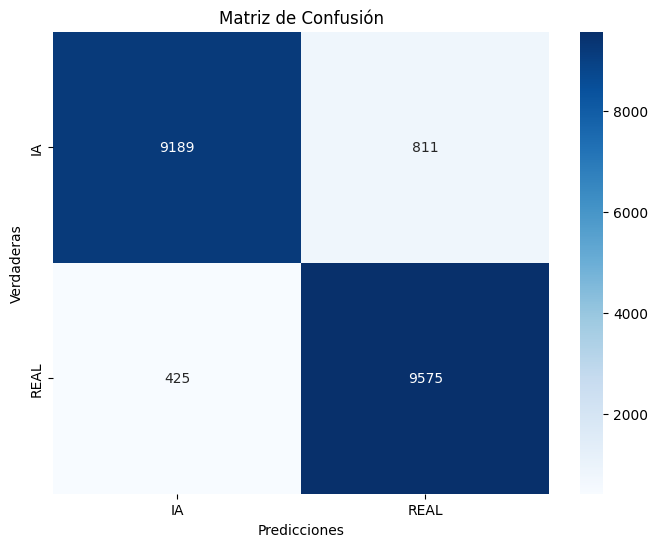

In [66]:
evaluate_model(model1, X_val, y_val)

Curva Roc

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


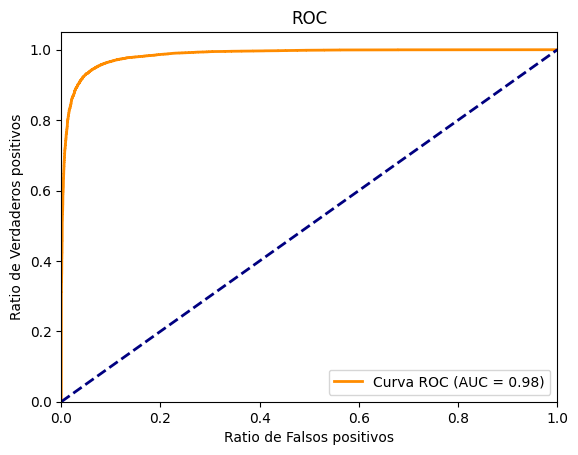

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

X_val_escalado = X_val*(1/255)
y_pred_prob = model1.predict(X_val_escalado)  

fpr, tpr, _ = roc_curve(y_val, y_pred_prob)  


roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de Falsos positivos')
plt.ylabel('Ratio de Verdaderos positivos')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [67]:
def visualize_errors(x_test, y_test, y_pred, num_images=5):
    # Encontrar índices de errores
    y_pred_classes = (y_pred > 0.5).astype(int)
    errors = np.where(y_test != y_pred_classes.flatten())[0]
    
    if len(errors) == 0:
        print("No se encontraron errores en las predicciones.")
        return

    # Mostrar un número limitado de imágenes incorrectas
    num_errors = min(num_images, len(errors))
    
    plt.figure(figsize=(12, 8))
    for i in range(num_errors):
        idx = errors[i]
        plt.subplot(1, num_errors, i + 1)
        plt.imshow(x_test[idx], cmap='gray')  # Suponiendo que las imágenes están en escala de grises
        plt.title(f'Verdadera: {y_test[idx]}\nPredicción: {y_pred_classes[idx][0]}')
        plt.axis('off')
    
    plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


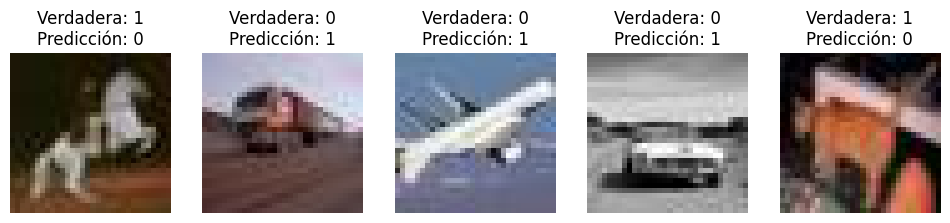

In [68]:
y_pred = model.predict(X_test)
visualize_errors(X_test, y_test, y_pred)


Vamos a intentar incrementar el número de capas para obtener un mejor test_acurracy

# Transfer Learning 

In [80]:
image_size = (32,32,3)
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=image_size, include_top=False)
pretrained_model.trainable = True

C:\Users\naira\AppData\Local\Temp\ipykernel_18264\1902825540.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pretrained_model = tf.keras.applications.MobileNetV2(input_shape=image_size, include_top=False)


In [81]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [82]:
inputs = tf.keras.Input(shape=image_size, name='input')

# pre-trained model
x = preprocess_input(inputs)
x = pretrained_model(x)

# classifier
flat = tf.keras.layers.Flatten()(x)
flat = tf.keras.layers.Dropout(0.5)(flat)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flat)

model_tl = tf.keras.Model(inputs, outputs)
model_tl.summary()

Model: "functional_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 2,225,153 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [83]:
model_tl.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

epochs = 20

import numpy as np
from sklearn.utils import class_weight

# Calcula las ponderaciones de las clases
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',  # La opción 'balanced' calcula las ponderaciones automáticamente.
    classes=np.unique(y_train),  # Las clases en tus datos.
    y=y_train  # El vector de etiquetas.
)

# Convierte el array de pesos a un diccionario para usarlo en el entrenamiento
class_weights_dict = dict(enumerate(class_weights))

es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=2,  
    verbose=1)

history = model_tl.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs=epochs,
)

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 419s 133ms/step - accuracy: 0.8508 - loss: 0.3812 - val_accuracy: 0.7218 - val_loss: 0.7721
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 479s 191ms/step - accuracy: 0.8894 - loss: 0.3017 - val_accuracy: 0.8888 - val_loss: 0.5208
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 526s 210ms/step - accuracy: 0.9021 - loss: 0.2693 - val_accuracy: 0.7894 - val_loss: 1.7080
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 491s 197ms/step - accuracy: 0.8997 - loss: 0.2594 - val_accuracy: 0.7543 - val_loss: 1.1189
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 321s 128ms/step - accuracy: 0.8929 - loss: 0.2794 - val_accuracy: 0.6846 - val_loss: 1.3709
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 611s 244ms/step - accuracy: 0.8878 - loss: 0.2803 - val_accuracy: 0.9251 - val_loss: 0.3813
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 512s 205ms/step - accuracy: 0.9164 - loss: 0.2136 - val_accuracy: 0.9190 - val_loss: 0.2613
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 458s 183ms/step - ac

In [84]:
results = model_tl.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8966 - loss: 0.3794
Test Loss: 0.37761104106903076
Test Accuracy: 0.8968999981880188


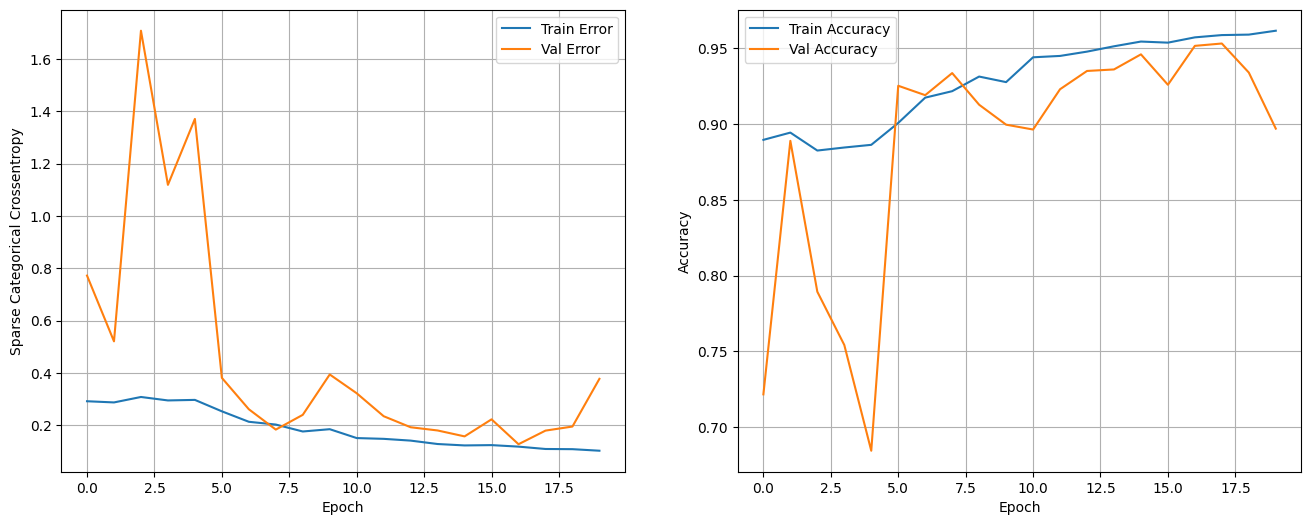

In [85]:
show_loss_accuracy_evolution(history)

625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 77ms/step


c:\Users\naira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\naira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de Clasificación:
               precision    recall  f1-score   support

          IA       0.00      0.00      0.00     10000
        REAL       0.50      1.00      0.67     10000

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000



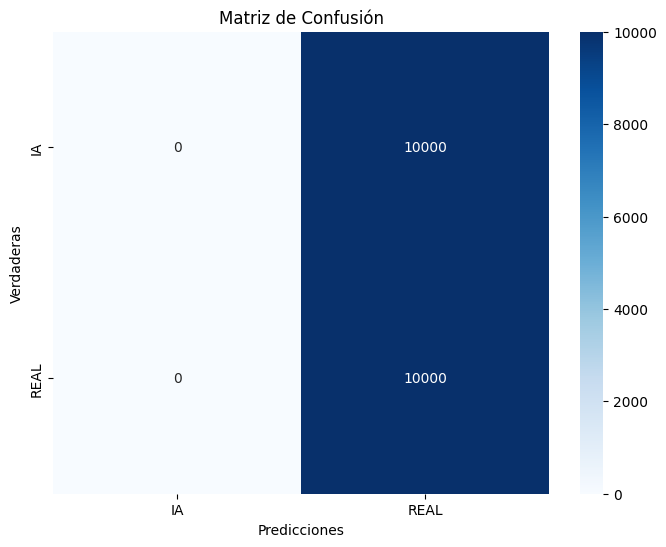

In [86]:
evaluate_model(model_tl,X_val, y_val)